<a href="https://colab.research.google.com/github/beedrumms/Vax-Tweets-in-Ontario/blob/main/EDA_of_Vax_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load 

In [ ]:
# Explortory Analysis libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
import collections
from collections import Counter 
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

import sklearn 
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.util import ngrams

# Mounting google colab on drive 
from google.colab import drive, files
import os
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# download my dataset from my drive 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/processed_vax_tweets.csv')    
tweets_df = data[['Datetime', 'Text', 'Text_Unprocessed']]
tweets_df.columns, tweets_df.shape # ensuring everthing read in properly

(Index(['Datetime', 'Text', 'Text_Unprocessed'], dtype='object'), (20044, 3))

In [ ]:
# Converting dates to datetime objects 
tweets_df['Datetime'] = pd.to_datetime(tweets_df['Datetime']) # converting to datetime
tweets_df['Datetime'] = tweets_df['Datetime'].dt.date # converting to just Year-Month-Day format 
tweets_df.Datetime.head(2), tweets_df.Datetime.tail(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(0    2021-08-28
 1    2021-08-28
 Name: Datetime, dtype: object, 20042    2021-08-22
 20043    2021-08-22
 Name: Datetime, dtype: object)

In [ ]:
is_not_na = tweets_df['Text'].notna()
tweets_df = tweets_df[is_not_na]
tweets_df

,Datetime,Text,Text_Unprocessed
0,2021-08-28,vaccine passport racist blackface support raci...,Vaccine passports are RACIST and blackface s...
1,2021-08-28,million people take vaccine effect die take ja...,Millions of people have taken the vaccin...
2,2021-08-28,fear ground real event ask logic critical thin...,"So your fear is grounded in a real event, ..."
3,2021-08-28,prove racist white people love vaccine vaccine...,Proving is a RACIST. Only white people love...
4,2021-08-28,star report ford announce vax passport week ca...,The Star is reporting that Ford will be a...
...,...,...,...
20039,2021-08-22,reality proof vaccination transmit stop divide...,Reality of Proof of Vaccination 💉You can still...
20040,2021-08-22,believe force coerced ( by medium govt other )...,How many of the believe they were forced o...
20041,2021-08-22,guy brain dead remember similar case number ye...,Are you guys too brain dead to remember we h...
20042,2021-08-22,vaccine safe effective vaxd risk,If the vaccine is so safe and effective why a...


# Visualize

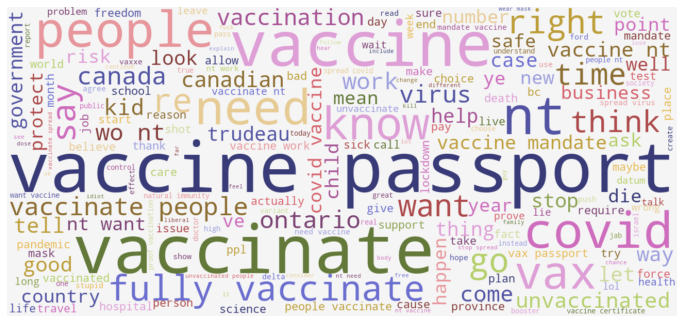

In [ ]:
# Looking again at the clean data word cloud we have some ideas of the themes people are talking about 
tweet_str = [] # Making string of tweet data
for t in tweets_df['Text']:
  tweet_str.append(t)
tweet_str = pd.Series(tweet_str).str.cat(sep=' ')

tweet_cloud = WordCloud(width=1300, height=600, max_font_size=200, background_color="whitesmoke", colormap="tab20b").generate(tweet_str) # creating the word cloud 
plt.figure(figsize=(12,12))
plt.imshow(tweet_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Looking at how many unique dates I have 
print(tweets_df['Datetime'].nunique()) # 7 unique days
import statistics
print(statistics.mean(tweets_df['Datetime'].value_counts())) # 2863 tweets a day is the average
print(statistics.median(tweets_df['Datetime'].value_counts())) # 2639 tweets a day is the median 
print(max(tweets_df['Datetime'].value_counts())) # 4288
print(min(tweets_df['Datetime'].value_counts())) # 2256

7
2856.5714285714284
2638
4278
2249


In [ ]:
dates = tweets_df['Datetime'].value_counts() > 500 
dates_with_500_occurances = dates[dates == True]
dates_with_500_occurances # all dates have the min day requirment of 500 occurances

2021-08-27    True
2021-08-26    True
2021-08-28    True
2021-08-22    True
2021-08-23    True
2021-08-25    True
2021-08-24    True
Name: Datetime, dtype: bool

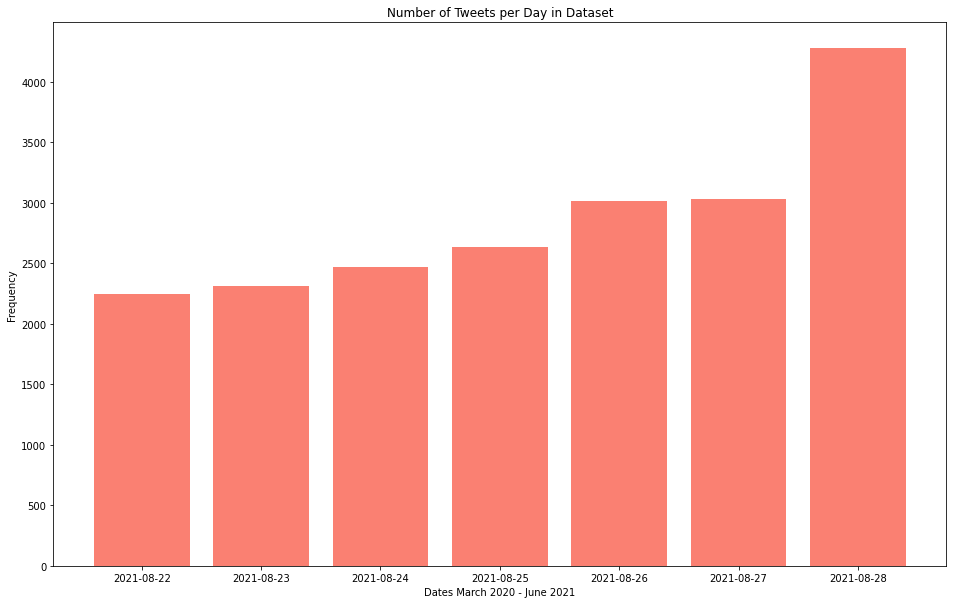

In [ ]:
# Visualizing the frequency of tweets per day
x_val = tweets_df['Datetime'].unique()
h_val = tweets_df['Datetime'].value_counts()
plt.bar(x = x_val, height = h_val, color = 'salmon')
plt.xlabel("Dates March 2020 - June 2021")
plt.ylabel("Frequency")
plt.title("Number of Tweets per Day in Dataset")
plt.rc('figure', figsize=(16,10))
plt.show()

In [ ]:
tweets_list = tweets_df['Text'].tolist()

# Tokenize
wordsy = [] 
for t in tweets_list:
  wordsy.append(str(t).split())

# Count word frequencies
tweet_stream = [item for sublist in wordsy for item in sublist]
word_counts = collections.Counter(tweet_stream)
word_counts.most_common(100)

[('vaccine', 12011),
 ('vaccinate', 7766),
 ('nt', 6045),
 ('people', 4636),
 ('passport', 3952),
 ('do', 3839),
 ('covid', 3076),
 ('vax', 2674),
 ('vaccination', 2151),
 ('s', 1960),
 ('get', 1946),
 ('need', 1881),
 ('want', 1647),
 ('spread', 1485),
 ('like', 1423),
 ('virus', 1387),
 ('fully', 1380),
 ('I', 1359),
 ('know', 1331),
 ('right', 1331),
 ('work', 1278),
 ('you', 1276),
 ('re', 1259),
 ('stop', 1248),
 ('mandate', 1248),
 ('go', 1169),
 ('m', 1152),
 ('be', 1098),
 (')', 1090),
 ('unvaccinated', 1067),
 ('say', 1045),
 ('case', 1041),
 ('think', 1038),
 ('ontario', 1007),
 ('(', 955),
 ('health', 915),
 ('time', 886),
 ('that', 844),
 ('protect', 827),
 ('canada', 788),
 ('risk', 778),
 ('kid', 770),
 ('…', 742),
 ('force', 734),
 ('come', 732),
 ('die', 713),
 ('business', 706),
 ('good', 688),
 ('vaccinated', 671),
 ('wo', 670),
 ('country', 661),
 ('thing', 658),
 ('government', 650),
 ('year', 646),
 ('safe', 645),
 ('tell', 628),
 ('child', 625),
 ('choice', 623),


In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_words(tweets_list, 15)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 15 Unigrams"))
fig.show()

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(tweets_list, 15)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 15 Bigrams"))
fig.show()

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(tweets_list, 15)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 15 Trigrams"))
fig.show()